In [1]:
import os

# Change the current working directory
os.chdir(r"C:\Users\alfat\Downloads\CSSci Semester 4\code")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [3]:
pd.set_option('mode.chained_assignment', None) 


In [4]:
# import data & add column names
newdf = pd.read_csv('final_data.csv')
newdf.head()

,Unnamed: 0,att_Armed Assault,att_Assassination,att_Bombing/Explosion,att_Facility/Infrastructure Attack,att_Hijacking,att_Hostage Taking (Barricade Incident),att_Unarmed Assault,weap_Biological,weap_Chemical,...,v2clacfree,v2dlencmps,v2elembcap,v2exhoshog,v2clrelig,Population,Net migration,Births from mothers aged 15 to 19 years,Population density,GDP
0,0,1,0,0,0,0,0,0,0,0,...,1.725,0.854,0.650,1.0,2.429,1.819148e+06,5709.0,8375.0,2.2096,1.221190e+10
1,1,0,0,0,0,0,0,0,0,0,...,1.725,0.854,0.650,1.0,2.429,1.819148e+06,5709.0,8375.0,2.2096,1.221190e+10
2,2,1,0,0,0,0,0,0,0,0,...,1.090,1.222,1.499,0.0,0.593,1.059634e+09,-149966.0,5222965.0,356.3962,2.724477e+12
3,3,0,0,1,0,0,0,0,0,0,...,1.235,1.243,0.772,1.0,1.099,1.823291e+06,-9176.0,2092.0,167.1973,NaN
4,4,0,0,1,0,0,0,0,0,0,...,1.090,1.222,1.499,0.0,0.593,1.059634e+09,-149966.0,5222965.0,356.3962,2.724477e+12


In [5]:
# Assuming your DataFrame is named 'df'
df = newdf[newdf['reg_North America'] == 1]

In [6]:
df

,Unnamed: 0,att_Armed Assault,att_Assassination,att_Bombing/Explosion,att_Facility/Infrastructure Attack,att_Hijacking,att_Hostage Taking (Barricade Incident),att_Unarmed Assault,weap_Biological,weap_Chemical,...,v2clacfree,v2dlencmps,v2elembcap,v2exhoshog,v2clrelig,Population,Net migration,Births from mothers aged 15 to 19 years,Population density,GDP
15,15,0,0,0,1,0,0,0,0,0,...,3.494,1.012,1.772,1.0,2.802,282398560.0,1479676.0,454704.0,30.8714,1.415771e+13
25,25,0,0,0,1,0,0,0,0,0,...,3.494,1.012,1.772,1.0,2.802,282398560.0,1479676.0,454704.0,30.8714,1.415771e+13
26,26,0,0,1,0,0,0,0,0,0,...,3.494,1.012,1.772,1.0,2.802,282398560.0,1479676.0,454704.0,30.8714,1.415771e+13
27,27,0,0,1,0,0,0,0,0,0,...,3.494,1.012,1.772,1.0,2.802,282398560.0,1479676.0,454704.0,30.8714,1.415771e+13
86,86,0,0,0,1,0,0,0,0,0,...,3.494,1.012,1.772,1.0,2.802,282398560.0,1479676.0,454704.0,30.8714,1.415771e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82225,82225,0,0,0,1,0,0,0,0,0,...,2.976,1.155,1.668,1.0,2.317,335942000.0,675560.0,169738.0,36.7246,1.994571e+13
82231,82231,0,0,0,0,0,0,0,0,0,...,2.976,1.155,1.668,1.0,2.317,335942000.0,675560.0,169738.0,36.7246,1.994571e+13
82252,82252,0,0,0,1,0,0,0,0,0,...,2.976,1.155,1.668,1.0,2.317,335942000.0,675560.0,169738.0,36.7246,1.994571e+13
82369,82369,0,0,1,0,0,0,0,0,0,...,2.976,1.155,1.668,1.0,2.317,335942000.0,675560.0,169738.0,36.7246,1.994571e+13


In [7]:
# Create a new column `high_risk` and initialize it with zeros
df['lethality'] = 0

# Identify rows where `nkill` is greater than 5 and set `high_risk` to 1
df.loc[df['nkill'] > 0, 'lethality'] = 1

# Calculate the counts of unique values in the `high_risk` column
value_counts = df['lethality'].value_counts()

# Rename the index for clarity
value_counts.index = ['Not lethal', 'lethal']

# Print the results
print("Counts of lethal vs. Not lethal:")
print(value_counts.to_markdown(numalign="left", stralign="left"))

Counts of lethal vs. Not lethal:
|            | lethality   |
|:-----------|:------------|
| Not lethal | 774         |
| lethal     | 246         |


In [8]:
df['lethality']

15       0
25       0
26       0
27       0
86       0
        ..
82225    0
82231    1
82252    0
82369    1
82418    0
Name: lethality, Length: 1020, dtype: int64

In [9]:
# Add interactions that explain the lethality
df['bombing_transport'] = df['att_Bombing/Explosion'] * df['targ_Transportation']
df['success_rulelaw'] = df['v2cldiscw'] * df['suicide']
df['gdppercapita'] = df['GDP']/df['Population']
# df['new1'] = df['Births from mothers aged 15 to 19 years'] * df['reg_Central America & Caribbean']
# df['new2'] = df['Births from mothers aged 15 to 19 years'] * df['reg_Central Asia']
# df['new3'] = df['Births from mothers aged 15 to 19 years'] * df['reg_East Asia']
# df['new4'] = df['Births from mothers aged 15 to 19 years'] * df['reg_Eastern Europe']
# df['new5'] = df['Births from mothers aged 15 to 19 years'] * df['reg_Middle East & North Africa']
# df['new6'] = df['Births from mothers aged 15 to 19 years'] * df['reg_North America']
# df['new7'] = df['Births from mothers aged 15 to 19 years'] * df['reg_South America']
# df['new8'] = df['Births from mothers aged 15 to 19 years'] * df['reg_South Asia']
# df['new9'] = df['Births from mothers aged 15 to 19 years'] * df['reg_Southeast Asia']
# df['new10'] = df['Births from mothers aged 15 to 19 years'] * df['reg_Sub-Saharan Africa']
# df['new11'] = df['Births from mothers aged 15 to 19 years'] * df['reg_Western Europe']

In [10]:
# Drop the column `nkill`
df.drop(columns=['nkill'], inplace=True)

In [11]:
all_columns = df.columns.tolist()
print(all_columns)

['Unnamed: 0', 'att_Armed Assault', 'att_Assassination', 'att_Bombing/Explosion', 'att_Facility/Infrastructure Attack', 'att_Hijacking', 'att_Hostage Taking (Barricade Incident)', 'att_Unarmed Assault', 'weap_Biological', 'weap_Chemical', 'weap_Explosives', 'weap_Fake Weapons', 'weap_Firearms', 'weap_Incendiary', 'weap_Melee', 'weap_Other', 'weap_Radiological', 'weap_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'targ_Abortion Related', 'targ_Airports & Aircraft', 'targ_Business', 'targ_Educational Institution', 'targ_Food or Water Supply', 'targ_Government (Diplomatic)', 'targ_Government (General)', 'targ_Journalists & Media', 'targ_Maritime', 'targ_Military', 'targ_NGO', 'targ_Police', 'targ_Private Citizens & Property', 'targ_Religious Figures/Institutions', 'targ_Telecommunication', 'targ_Terrorists/Non-State Militia', 'targ_Tourists', 'targ_Transportation', 'targ_Utilities', 'targ_Violent Political Party', 'reg_Central America & Caribbean', 'reg_Cen

In [12]:
# 'reg_Central America & Caribbean', 'reg_Central Asia', 'reg_East Asia', 'reg_Eastern Europe', 'reg_Middle East & North Africa', 'reg_North America', 'reg_South America', 'reg_South Asia', 'reg_Southeast Asia',
# 

In [13]:
X = df.drop('lethality', axis=1)  # features
y = df['lethality']  # target

# Assuming X is your original feature matrix and you want to use only columns 'age', 'income', and 'education'
X_selected = X[['suicide', 'success_rulelaw', 'multiple', 'v2x_clphy', 'v2x_rule', 'v2cldiscw', 'v2clacfree', 'v2dlencmps', 'v2elembcap', 'v2exhoshog', 'v2clrelig', 'individual', 'v2x_ex_military', 'att_Armed Assault', 'att_Assassination', 'att_Bombing/Explosion', 'att_Facility/Infrastructure Attack', 'att_Hijacking', 'att_Hostage Taking (Barricade Incident)', 'att_Unarmed Assault', 'targ_Abortion Related', 
                'targ_Airports & Aircraft', 'targ_Business', 'targ_Educational Institution', 'targ_Food or Water Supply', 'targ_Government (Diplomatic)', 'targ_Government (General)', 'targ_Journalists & Media', 'targ_Maritime', 'targ_Military', 'targ_NGO', 'targ_Police', 'targ_Private Citizens & Property', 'targ_Religious Figures/Institutions', 'targ_Telecommunication', 'targ_Terrorists/Non-State Militia', 'targ_Tourists', 'targ_Transportation', 'targ_Utilities', 'targ_Violent Political Party',
                'n_weap', 'n_att', 'n_targ', 'gdppercapita', 'Net migration', 'Births from mothers aged 15 to 19 years', 'Population density', 'weap_Biological', 'weap_Chemical', 'weap_Explosives', 'weap_Fake Weapons', 'weap_Firearms', 'weap_Incendiary', 'weap_Melee', 'weap_Other', 'weap_Radiological', 'weap_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)']]


# Split the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
print([type(X_train.iloc[0,i]) for i in range(len(X_train.columns))])

[<class 'numpy.int64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.float64'>, <class 'numpy.int64'>, <class 'numpy.float64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'numpy.int64'>, <class 'num

In [14]:
from sklearn.model_selection import GridSearchCV

# Define your base model (DecisionTreeClassifier)
clf = DecisionTreeClassifier()

# Define the hyperparameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_clf = grid_search.best_estimator_

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [15]:
# Evaluate the best model on your test data
accuracy = best_clf.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.8529411764705882


In [16]:
clf = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=10, 
    min_samples_split=2, 
    min_samples_leaf=4,
    max_features=None,
    min_impurity_decrease=0.0
)


# Fit the model to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4)

In [17]:
# Making predictions
predictions = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8676


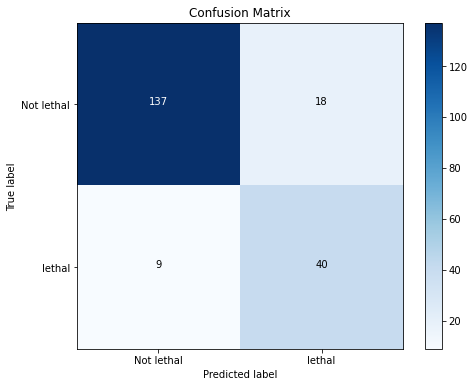

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Not lethal', 'lethal'])
plt.yticks([0, 1], ['Not lethal', 'lethal'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()

In [19]:
plt.figure(figsize=(200,100))
plot_tree(clf, 
          filled=True, 
          rounded=True, 
          class_names=['0', '1'],  # Update class names as appropriate
          feature_names=list(X_train.columns))       # Ensure X_train.columns is accessible
plt.show()

C:\Users\alfat\AppData\Local\Temp\ipykernel_26428\3455866844.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


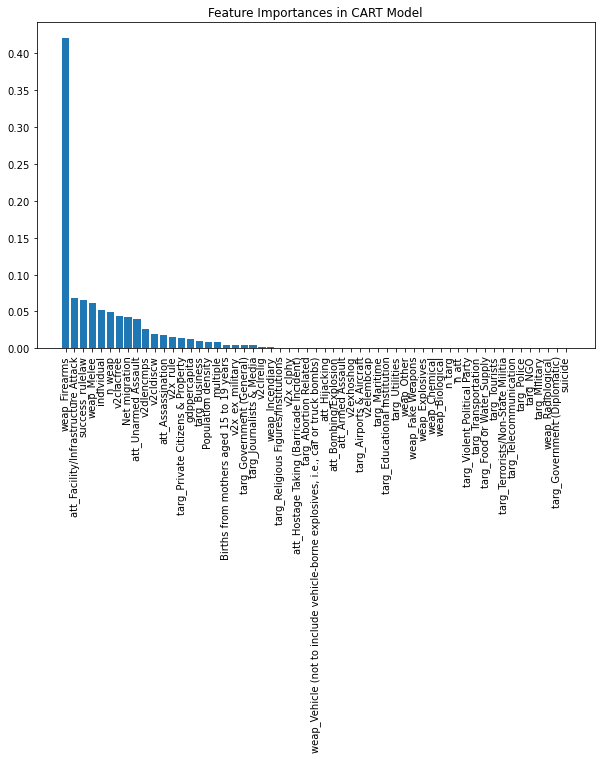

In [20]:
# Extract feature importances
importances = clf.feature_importances_

# Sort importances and get corresponding feature names
indices = importances.argsort()[::-1]  # Sort in descending order
feature_names = X_selected.columns

# Print bar chart of feature importances 
plt.figure(figsize=(10, 6))
plt.bar(range(X_selected.shape[1]), importances[indices])
plt.xticks(range(X_selected.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.title("Feature Importances in CART Model")
plt.tight_layout()
plt.show()